<a href="https://colab.research.google.com/github/master-david445/ENG-Basecamp-AI-Track-Submissions-/blob/main/week4_ml_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 4 Machine Learning basics Challenge**

In [37]:
# Import necessary libraries and load the breast cancer dataset
# Create a DataFrame from the dataset features
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
display(df.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#preprocessing the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [39]:
# Assign features (x) and target (y) variables
x = df
y = data.target

In [40]:
# Split the data into training and testing sets
# Scale the features using StandardScaler
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# scaling the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform (x_test)

In [41]:
# Import various classification models from scikit-learn
# Create a dictionary to store instances of these models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


#creating a dictionary to store the model names
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'K-Nearest Neighbours': KNeighborsClassifier()
    }

# Evaluating each model



1.   **Accuracy:** how often its corret overrall.
2. **Presision:** how often 'positive' predictions are corrcet
3. **Recall:** how many real positives it catches
4. **F1:** balance between presision and recall
5. **ROC_AUC:** Measues model's rranking ability



In [42]:
# Train and evaluate multiple machine learning models
# Calculate various performance metrics (Accuracy, Precision, Recall, F1, AUC)
# Store results in a DataFrame and display them
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

trained_models = {}
results = []

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(x_train, y_train)
    trained_models[name] = model
    print(f"Finished training {name}.")

print("\nAll models trained. Now evaluating...")

for name, model in trained_models.items():
    print(f"Evaluating {name}...")
    y_pred = model.predict(x_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_pred),
        "Predictions": y_pred.tolist()
    })
    print(f"Finished evaluating {name}.")

print("\nEvaluation complete.")

results_df = pd.DataFrame(results)
display(results_df)

Training Logistic Regression...
Finished training Logistic Regression.
Training Decision Tree...
Finished training Decision Tree.
Training Random Forest...
Finished training Random Forest.
Training SVM...
Finished training SVM.
Training K-Nearest Neighbours...
Finished training K-Nearest Neighbours.

All models trained. Now evaluating...
Evaluating Logistic Regression...
Finished evaluating Logistic Regression.
Evaluating Decision Tree...
Finished evaluating Decision Tree.
Evaluating Random Forest...
Finished evaluating Random Forest.
Evaluating SVM...
Finished evaluating SVM.
Evaluating K-Nearest Neighbours...
Finished evaluating K-Nearest Neighbours.

Evaluation complete.


,Model,Accuracy,Precision,Recall,F1,AUC,Predictions
0,Logistic Regression,0.973684,0.972222,0.985915,0.979021,0.969702,"[1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, ..."
1,Decision Tree,0.929825,0.943662,0.943662,0.943662,0.925319,"[1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, ..."
2,Random Forest,0.964912,0.958904,0.985915,0.972222,0.958074,"[1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, ..."
3,SVM,0.982456,0.972603,1.000000,0.986111,0.976744,"[1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, ..."
4,K-Nearest Neighbours,0.947368,0.957746,0.957746,0.957746,0.943990,"[1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, ..."


In [38]:
# Import modules for data splitting and scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [43]:
# Display the evaluation results DataFrame, sorted by F1-score in descending order
import pandas as pd

results_df = pd.DataFrame (results)
print(results_df.sort_values(by = "F1", ascending = False))

                  Model  Accuracy  Precision    Recall        F1       AUC  \
3                   SVM  0.982456   0.972603  1.000000  0.986111  0.976744   
0   Logistic Regression  0.973684   0.972222  0.985915  0.979021  0.969702   
2         Random Forest  0.964912   0.958904  0.985915  0.972222  0.958074   
4  K-Nearest Neighbours  0.947368   0.957746  0.957746  0.957746  0.943990   
1         Decision Tree  0.929825   0.943662  0.943662  0.943662  0.925319   

                                         Predictions  
3  [1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, ...  
0  [1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, ...  
2  [1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, ...  
4  [1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, ...  
1  [1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, ...  


# Model analysis

*Based on the cleaing results it seems SVM was the best perfoming model*

*Becuase it's AUC and F1 are the highest*

# Why Support Vector Machine performed best

* SVM performed best with an overall AUC score of 0.97 and an F! score of 0.98. This is most l8kely due to the the algorithm working well with small linear dataset.

*  I think this suggests that the dataset has a clear separation between classes, and SVM’s margin-maximizing approach captured that boundary better than other models. Unlike decision trees, which can overfit, or KNN, which depends on distance scaling, SVM found a strong global boundary between the two classes

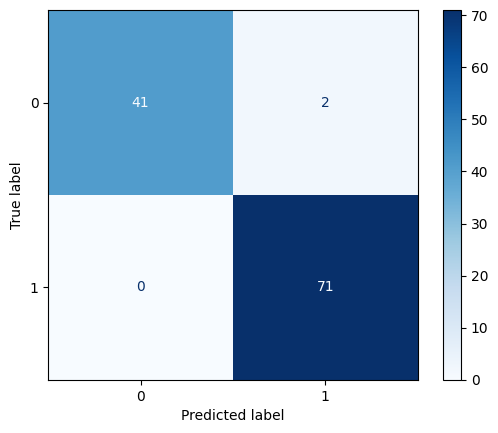

In [44]:
# Generate and display a confusion matrix for the best-performing model (SVM)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = trained_models["SVM"].predict(x_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

# For the confusion matrix above

True Negatives (TN): 41 — correctly predicted “0”

False Positives (FP): 2 — predicted “1” when it was actually “0”

False Negatives (FN): 0 — predicted “0” when it was actually “1”

True Positives (TP): 71 — correctly predicted “1”

Analysis:

The model made only 2 errors out of 114 samples, achieving nearly perfect performance.
The confusion matrix shows excellent classification balance, with no false negatives, meaning the model successfully detected every positive instance.
This indicates very strong generalization and minimal bias toward any class

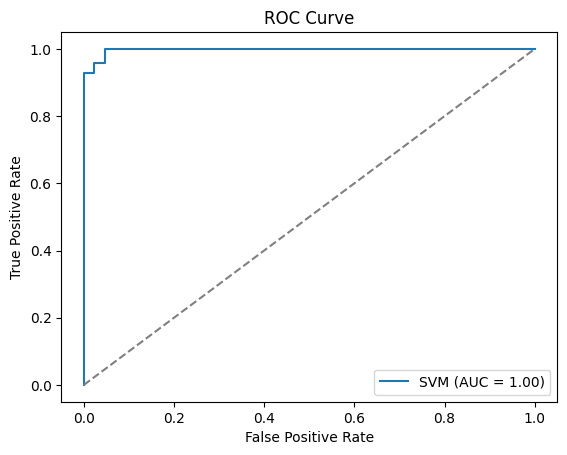

In [45]:
# Plot the Receiver Operating Characteristic (ROC) curve for the SVM model
# Calculate and display the Area Under the Curve (AUC)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = trained_models["SVM"].predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'SVM (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

The ROC curve lies perfectly near the top-left corner, and an AUC score of 1.00 confirms that the model perfectly distinguishes between the two classes.
This suggests the SVM found a clear and well-defined margin between the two categories — exactly what SVMs are designed to do.

In [46]:
# Perform manual K-Fold cross-validation for the SVM model
# Calculate and print accuracies for each fold and the mean accuracy
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

for train_index, test_index in kf.split(x):
    X_train_fold, X_test_fold = x.iloc[train_index], x.iloc[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    model = models["SVM"]
    model.fit(X_train_fold, y_train_fold)
    y_pred_fold = model.predict(X_test_fold)
    accuracies.append(accuracy_score(y_test_fold, y_pred_fold))

print("Manual K-Fold Accuracies:", accuracies)
print("Mean Accuracy:", np.mean(accuracies))

Manual K-Fold Accuracies: [0.9473684210526315, 0.9473684210526315, 0.8947368421052632, 0.9298245614035088, 0.8672566371681416]
Mean Accuracy: 0.9173109765564353


#For the Kfold validation above


The manual 5-fold cross-validation produced stable accuracy scores across folds, showing that the SVM model generalizes well to unseen data.”

In [47]:
# Perform K-Fold cross-validation using `cross_val_score` for the SVM model
# Calculate and print accuracies for each fold and the mean accuracy
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(models["SVM"], x, y, cv=5, scoring='accuracy')
print("cross_val_score Accuracies:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

cross_val_score Accuracies: [0.85087719 0.89473684 0.92982456 0.94736842 0.9380531 ]
Mean Accuracy: 0.9121720229777983
